<center><h1> Tuning Hyperparameters FFNNA (Tag 2) </h1>
John Ignacio R.M. 12 SPOOKY month 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada2.data import read_dataset, split_dataset, all_hyperparams_comb
from ada2.model import FeedForwardNeuralNetworkArchitecture as FFNNA
from ada2.plot import plot_confidence_matrix
import pandas as pd
from IPython.core.display import display, HTML

#keras
from keras.optimizers import adam, adadelta, adagrad, adamax

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
source_path = "../processed_data/xtohhOct2020"
bg = "Xtohh_background"
seed = 420

# Xtohh2000

In [3]:
signal = "Xtohh2000"

In [4]:
# Read xtohh dataset in SR tag 2
df = read_dataset(source_path, signal, bg, "SR", 2)
df

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.887240,1631.67020,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.033330,1293.40280,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.559220,1659.84830,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.607220,1075.30920,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.350300,1595.76110,244.283460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0.006433,0,402.06714,0.109710,-1.277847,68576.34,486.71262,-0.060529,1.469456,120999.410,2.747302,2.752572,-0.883233,84.210686,891.92240,192.862270
8802,0.004849,0,542.29900,1.579771,-2.624035,84161.26,411.07132,1.205967,0.438185,56194.777,3.062220,3.084951,-0.216563,59.169407,970.41110,136.471160
8803,0.004849,0,548.63104,-0.033452,2.621298,79095.04,416.03915,0.336025,-0.553298,70408.830,3.108589,3.130470,-0.352454,34.371227,983.20233,133.526060
8804,0.007816,0,683.98340,-0.029910,-0.760806,110728.80,609.47140,0.094448,2.401307,148632.220,3.121072,3.123549,0.351719,55.616740,1320.47700,75.680750


In [5]:
lrs = [5e-3, 1e-2, 5e-2, 1e-1]
optis = [adam, adadelta, adagrad, adamax]
activs = ["relu", "softplus"]

splits = [
    (0.6, 0.2, 0.2), (0.5, 0.3, 0.2), #80:20
    (0.5, 0.2, 0.3), (0.4, 0.3, 0.3), #70:30
    (0.4, 0.2, 0.4), (0.3, 0.3, 0.4), #60:40
]

sets = [split_dataset(df, *split, seed) for split in splits]
ths = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

combs = [(sets[i], splits[i], lr, opti, acti) for i in range(len(splits))
                                                        for lr in lrs
                                                            for opti in optis
                                                                for acti in activs]
len(combs)

192

In [6]:
f1_per_comb = all_hyperparams_comb(FFNNA, combs, ths, 50, "../saved_models/tuningFFNNAxtohh2000")

uccesful training
[ ] Saving...
[~] Succesful saving
Comb 102: (0.4, 0.3, 0.3) 0.005 <class 'keras.optimizers.Adamax'> relu
[ ] Training...
[~] Succesful training
[ ] Saving...
[~] Succesful saving
Comb 103: (0.4, 0.3, 0.3) 0.005 <class 'keras.optimizers.Adamax'> softplus
[ ] Training...
[~] Succesful training
[ ] Saving...
[~] Succesful saving
Comb 104: (0.4, 0.3, 0.3) 0.01 <class 'keras.optimizers.Adam'> relu
[ ] Training...
[~] Succesful training
[ ] Saving...
[~] Succesful saving
Comb 105: (0.4, 0.3, 0.3) 0.01 <class 'keras.optimizers.Adam'> softplus
[ ] Training...
[~] Succesful training
[ ] Saving...
[~] Succesful saving
Comb 106: (0.4, 0.3, 0.3) 0.01 <class 'keras.optimizers.Adadelta'> relu
[ ] Training...
[~] Succesful training
[ ] Saving...
[~] Succesful saving
Comb 107: (0.4, 0.3, 0.3) 0.01 <class 'keras.optimizers.Adadelta'> softplus
[ ] Training...
[~] Succesful training
[ ] Saving...
[~] Succesful saving
Comb 108: (0.4, 0.3, 0.3) 0.01 <class 'keras.optimizers.Adagrad'> rel

In [7]:
f1_per_comb.nlargest(15, ["wavg"])

0         1      wavg
comb th                               
38   0.6  0.910802  0.981771  0.969701
16   0.6  0.908223  0.982032  0.969479
     0.7  0.906026  0.981549  0.968704
22   0.3  0.906059  0.981082  0.968323
     0.7  0.908508  0.979633  0.967536
16   0.8  0.899668  0.980133  0.966449
     0.5  0.896616  0.980299  0.966067
56   0.8  0.899674  0.979277  0.965739
48   0.6  0.896884  0.979617  0.965547
22   0.4  0.894882  0.978513  0.964290
21   0.5  0.893548  0.978753  0.964262
48   0.7  0.892252  0.978569  0.963889
22   0.6  0.893421  0.977725  0.963387
62   0.8  0.894435  0.977258  0.963173
8    0.5  0.889771  0.978186  0.963149

# Combination 38

In [9]:
combs[38][1:]

((0.5, 0.3, 0.2), 0.005, keras.optimizers.Adamax, 'relu')

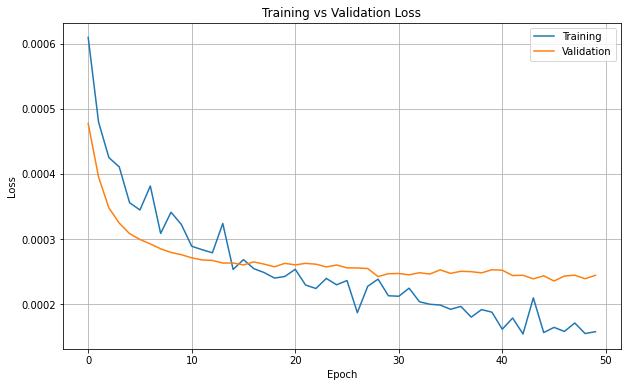

In [10]:
sets38 = combs[38][0]
model38 = FFNNA(sets38["x"]["test"].shape[1], 0.005, adamax, "relu")
model38.load("../saved_models/tuningFFNNAxtohh2000", f"t2_comb38")
model38.plot_loss()

In [12]:
eval38 = model38.complete_evaluation(
    sets38["x"]["test"], sets38["y"]["test"], sets38["w"]["test"], 0.6,
)
print("Accuracy:", eval38["accuracy"])

Accuracy: 0.9721906923950057


In [14]:
pd.DataFrame(eval38["weighted_class_report"])

,0,1,macro avg,weighted avg
precision,0.912856,0.981319,0.947088,0.969676
recall,0.908757,0.982223,0.945490,0.969728
f1-score,0.910802,0.981771,0.946286,0.969701
support,0.397218,1.938392,2.335610,2.335610


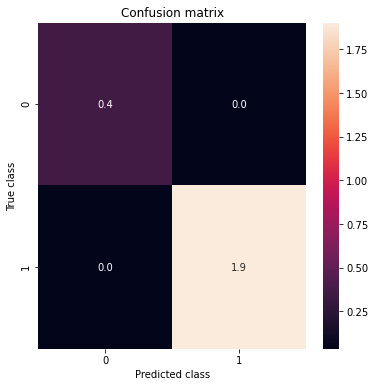

In [15]:
plot_confidence_matrix(eval38["weighted_cm"], 6, 6, '.1f')

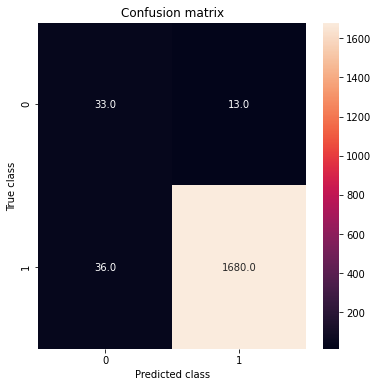

In [16]:
plot_confidence_matrix(eval38["cm"], 6, 6, '.1f')